<a href="https://colab.research.google.com/github/beyza522/Azheimer-Classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/AugmentedAlzheimerDataset.zip"

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/OriginalDataset.zip"

In [3]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [5]:
data = "/content/AugmentedAlzheimerDataset"

In [6]:
image_dir = Path(data)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) 

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [7]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("/content/AugmentedAlzheimerDataset").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [8]:
image_df

,Filepath,Label
0,/content/AugmentedAlzheimerDataset/ModerateDem...,ModerateDemented
1,/content/AugmentedAlzheimerDataset/ModerateDem...,ModerateDemented
2,/content/AugmentedAlzheimerDataset/ModerateDem...,ModerateDemented
3,/content/AugmentedAlzheimerDataset/ModerateDem...,ModerateDemented
4,/content/AugmentedAlzheimerDataset/ModerateDem...,ModerateDemented
...,...,...
33979,/content/AugmentedAlzheimerDataset/VeryMildDem...,VeryMildDemented
33980,/content/AugmentedAlzheimerDataset/VeryMildDem...,VeryMildDemented
33981,/content/AugmentedAlzheimerDataset/VeryMildDem...,VeryMildDemented
33982,/content/AugmentedAlzheimerDataset/VeryMildDem...,VeryMildDemented


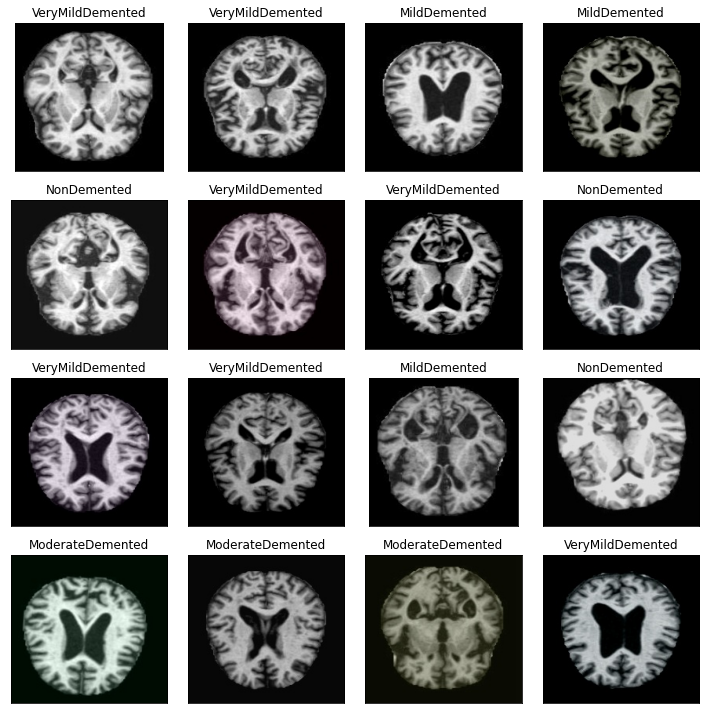

In [9]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()


In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split

In [11]:
train_images = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_images = train_datagen.flow_from_directory(
    data , # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


In [12]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(4, activation = 'softmax')
])

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=10)

Epoch 1/10
850/850 [==============================] - 62s 72ms/step - loss: 0.0481 - accuracy: 0.9833 - val_loss: 0.3302 - val_accuracy: 0.9082
Epoch 2/10
850/850 [==============================] - 61s 72ms/step - loss: 0.0437 - accuracy: 0.9847 - val_loss: 0.3900 - val_accuracy: 0.9148
Epoch 3/10
850/850 [==============================] - 64s 75ms/step - loss: 0.0436 - accuracy: 0.9856 - val_loss: 0.2908 - val_accuracy: 0.9191
Epoch 4/10
850/850 [==============================] - 61s 72ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.3378 - val_accuracy: 0.9173
Epoch 5/10
850/850 [==============================] - 61s 71ms/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 0.3614 - val_accuracy: 0.9200
Epoch 6/10
850/850 [==============================] - 63s 74ms/step - loss: 0.0368 - accuracy: 0.9876 - val_loss: 0.3154 - val_accuracy: 0.9213
Epoch 7/10
850/850 [==============================] - 59s 70ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.3241 - val_accuracy:

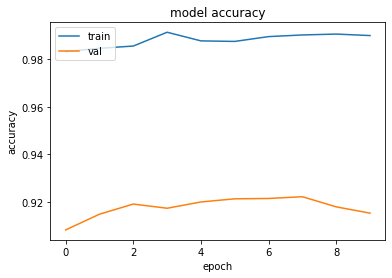

In [15]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

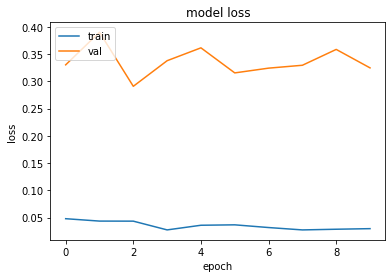

In [16]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
test_datagen  = ImageDataGenerator(rescale = 1./255)

In [18]:
test_dataset  = test_datagen.flow_from_directory(directory = '/content/OriginalDataset',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 128)

Found 6400 images belonging to 4 classes.


In [19]:
model.evaluate(test_dataset)

50/50 [==============================] - 9s 162ms/step - loss: 0.0597 - accuracy: 0.9791


[0.05974516272544861, 0.9790624976158142]

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset.zip"

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import skimage.io
from skimage.io import imread, imshow

1/1 [==============================] - 0s 22ms/step
100.0 % chances are there that the image is NonDemented


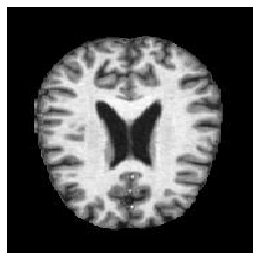

In [29]:
# Test Case 1: Non-Dementia

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/OriginalDataset/NonDemented/26 (100).jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 21ms/step
99.96 % chances are there that the image is MildDemented


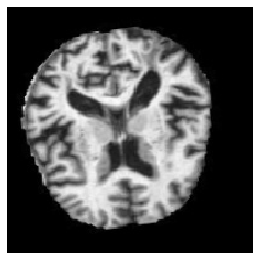

In [26]:
# Test Case 2: Mild Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/dataset/Test/MildDemented/000cdcc4-3e54-4034-a538-203c8047b564.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = np.argmax(model.predict(img), axis=1)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 21ms/step
100.0 % chances are there that the image is ModerateDemented


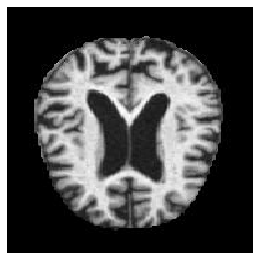

In [30]:
# Test Case 3: Moderate Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/OriginalDataset/ModerateDemented/27 (2).jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = np.argmax(model.predict(img), axis=1)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])
     

1/1 [==============================] - 0s 28ms/step
100.0 % chances are there that the image is VeryMildDemented


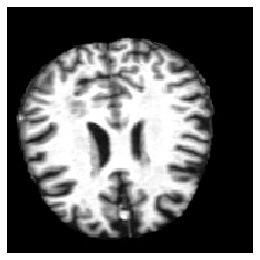

In [28]:
# Test Case 4: Very Mild Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/dataset/Test/VeryMildDemented/0001b959-d622-4311-acab-84633370c892.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = np.argmax(model.predict(img), axis=1)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 22ms/step
100.0 % chances are there that the image is MildDemented
1/1 [==============================] - 0s 20ms/step
99.98 % chances are there that the image is MildDemented
1/1 [==============================] - 0s 15ms/step
100.0 % chances are there that the image is MildDemented
1/1 [==============================] - 0s 15ms/step
100.0 % chances are there that the image is MildDemented
1/1 [==============================] - 0s 17ms/step
100.0 % chances are there that the image is MildDemented
1/1 [==============================] - 0s 16ms/step
100.0 % chances are there that the image is MildDemented
1/1 [==============================] - 0s 16ms/step
100.0 % chances are there that the image is MildDemented
1/1 [==============================] - 0s 15ms/step
100.0 % chances are there that the image is MildDemented
1/1 [==============================] - 0s 16ms/step
100.0 % chances are there that the image is MildDemented
1/1 [==============

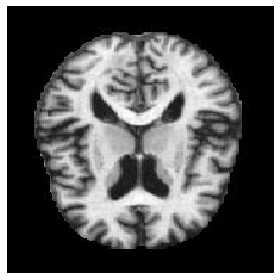

In [31]:
import cv2
import glob 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

for img_x in glob.glob("/content/OriginalDataset/MildDemented/*.jpg"):
  img = cv2.imread(img_x)
  img = load_img(img_x, target_size = (224,224,3))
  #img = load_img('/content/drive/MyDrive/Colab Notebooks/archive_y/OriginalDataset/VeryMildDemented/verymildDem430.jpg', target_size = (224,224,3))
  img = img_to_array(img)
  img = img/255
  imshow(img)
  plt.axis('off')
  img = np.expand_dims(img,axis=0)
  answer = np.argmax(model.predict(img), axis=1)
  probability=round(np.max(model.predict_on_batch(img)*100),2)
  print(probability, '% chances are there that the image is',idc[answer[0]])